In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data  
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 80
BATCH_SIZE = 30
EPOCH = 2

# Load the input tensor we saved in earlier practice

In [3]:
train_x = torch.load('./train_x.tensor')  
train_y = torch.load('./train_y.tensor')  

In [4]:
train_x = train_x.type(torch.FloatTensor)

In [5]:
train_x.shape

torch.Size([400, 80, 80, 3])

In [6]:
train_y = train_y.type(torch.LongTensor)

In [7]:
train_y.shape

torch.Size([400, 1])

In [8]:
train_y = train_y.view(400)

In [9]:
train_y.shape

torch.Size([400])

# Expand input tensor from 80x80x3 to 19200

In [10]:
train_x = train_x.view(400, 19200)

In [11]:
train_x.shape

torch.Size([400, 19200])

# Build tensor data set and data loader 

In [12]:
torch_dataset = Data.TensorDataset(data_tensor=train_x, target_tensor=train_y)

In [13]:
loader = Data.DataLoader(
    dataset=torch_dataset,     # torch TensorDataset format
    batch_size=BATCH_SIZE,       # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

# Define and build MLP

In [14]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [15]:
net = Net(19200 , 2000, 2)

In [16]:
net

Net(
  (hidden): Linear(in_features=19200, out_features=2000, bias=True)
  (predict): Linear(in_features=2000, out_features=2, bias=True)
)

In [17]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)

In [18]:
loss_func = torch.nn.CrossEntropyLoss()

# Test one training epoc

In [19]:
for step, (batch_x, batch_y) in enumerate(loader): 
    break

In [20]:
print(step, batch_x.shape, batch_y.shape)

0 torch.Size([30, 19200]) torch.Size([30])


In [21]:
batch_x = Variable(batch_x)
batch_y = Variable(batch_y)

In [22]:
out = net(batch_x)

In [23]:
out

Variable containing:
 33.3749   5.2484
  9.9723  -9.7627
 14.9675 -18.0275
 15.2193  -6.6575
  4.4741 -20.3246
 -2.6208 -12.2093
-15.6300 -17.7369
 15.7409 -36.2479
  6.2217  -6.2465
  4.3776 -18.7360
  2.8524 -13.4899
  5.1173 -17.7838
 12.4185 -50.5215
 -7.5361   1.2652
 -1.7827 -21.3903
  5.1044   0.0785
  9.4842 -28.2751
  4.5162 -60.6299
 -5.7980 -23.8290
  2.4293  -6.2177
 -0.8029  -8.4905
  7.8981 -11.0731
 -4.9618 -24.8892
  4.8737   0.1005
-21.7295 -11.8289
 22.8087  -2.3313
  8.2196 -32.6868
 -4.3226 -33.1386
  6.6500 -11.6966
 12.3796   8.8357
[torch.FloatTensor of size 30x2]

In [24]:
loss = loss_func(out, batch_y)
print(loss)

Variable containing:
 12.7574
[torch.FloatTensor of size 1]



In [25]:
loss.data[0]

12.757366180419922

# Train the MLP 

In [26]:
losslst = []
for epoch in range(EPOCH):   # train entire dataset EPOCH times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        #print('batch_x = ', batch_x.shape, 'batch_y = ', batch_y.shape)
        batch_x = Variable(batch_x)
        batch_y = Variable(batch_y)
        out = net(batch_x)
        #print('out = ', out.shape)
        loss = loss_func(out, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('Epoch: ', epoch, '| step: ', step, '| train loss: ', loss.data[0])
        losslst.append(loss.data[0])
    epoch = epoch + 1

Epoch:  0 | step:  0 | train loss:  14.933029174804688
Epoch:  0 | step:  1 | train loss:  14092572.0
Epoch:  0 | step:  2 | train loss:  14278909.0
Epoch:  0 | step:  3 | train loss:  442.1020202636719
Epoch:  0 | step:  4 | train loss:  647.2628173828125
Epoch:  0 | step:  5 | train loss:  3546.098876953125
Epoch:  0 | step:  6 | train loss:  325.0882568359375
Epoch:  0 | step:  7 | train loss:  461204.9375
Epoch:  0 | step:  8 | train loss:  176.37623596191406
Epoch:  0 | step:  9 | train loss:  0.7053111791610718
Epoch:  0 | step:  10 | train loss:  3.9533703327178955
Epoch:  0 | step:  11 | train loss:  2097.26318359375
Epoch:  0 | step:  12 | train loss:  213257.71875
Epoch:  0 | step:  13 | train loss:  0.765031099319458
Epoch:  1 | step:  0 | train loss:  0.6648396253585815
Epoch:  1 | step:  1 | train loss:  40.530338287353516
Epoch:  1 | step:  2 | train loss:  432878.4375
Epoch:  1 | step:  3 | train loss:  8131.88623046875
Epoch:  1 | step:  4 | train loss:  57.407543182373

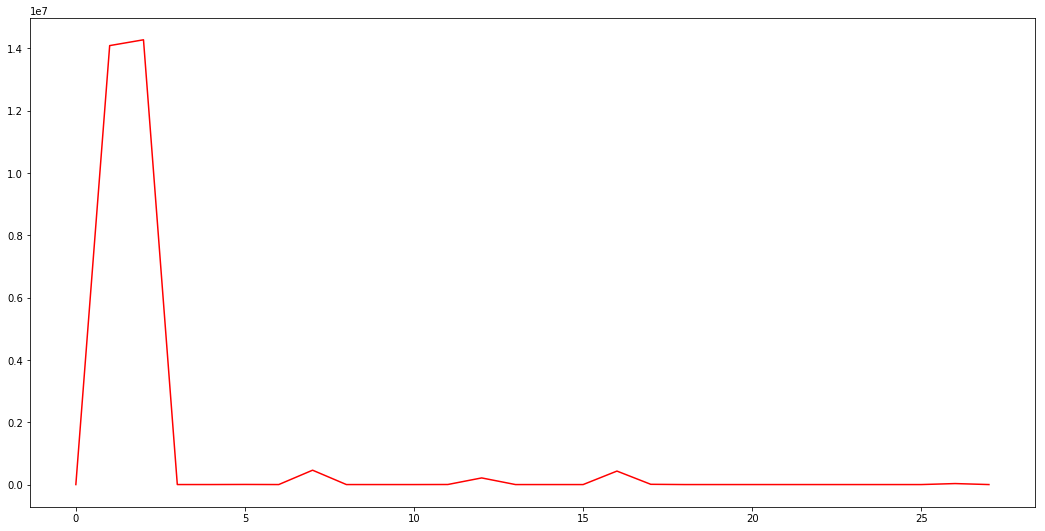

In [27]:
plt.figure(figsize=(18,9)) # set the figure size to 18 x 9 inches
plt.plot(losslst, color = 'red')
plt.show()